In [10]:
from scipy.special import voigt_profile
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 500)
s = voigt_profile(x,0,1.5)


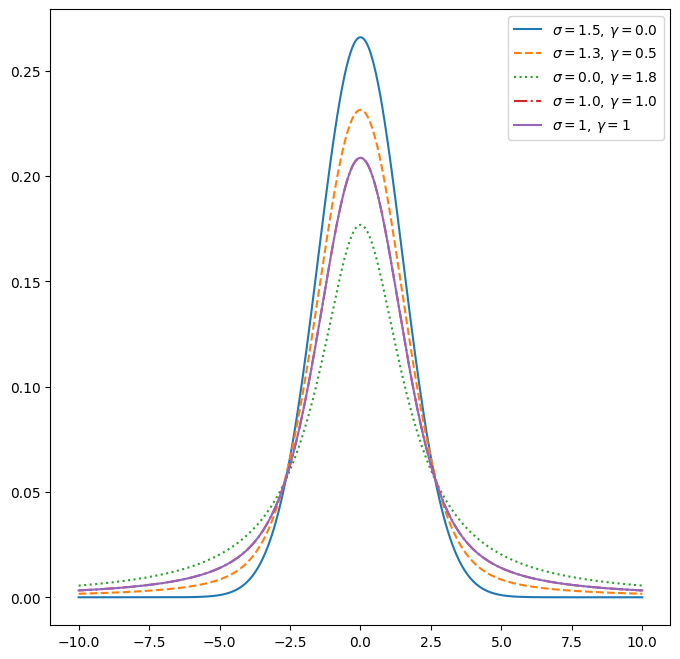

(2500,)

In [38]:
raman_signal = []
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(-10, 10, 500)
parameters_list = [(1.5, 0., "solid"), (1.3, 0.5, "dashed"),
                   (0., 1.8, "dotted"), (1., 1., "dashdot"),
                   (1,1, 'solid')]
for params in parameters_list:
    sigma, gamma, linestyle = params
    voigt = voigt_profile(x, sigma, gamma)
    raman_signal.append(voigt)
    ax.plot(x, voigt, label=rf"$\sigma={sigma},\, \gamma={gamma}$",
            ls=linestyle)
ax.legend()
plt.show()

raman_signal = np.concatenate(raman_signal) * 100
raman_signal.shape

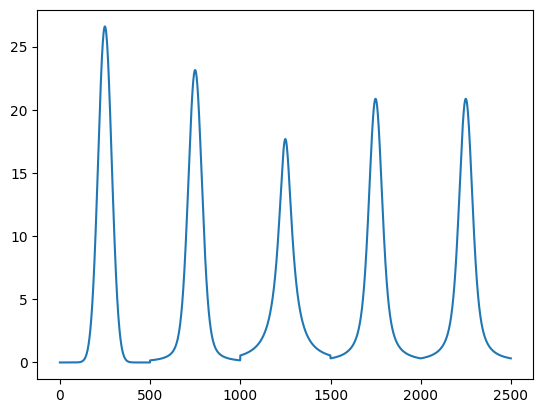

In [39]:

plt.plot(raman_signal)
plt.show()

In [65]:
import colorednoise as cn

samples = 2500
white_noise = cn.powerlaw_psd_gaussian(exponent=0, size=samples, )
pink_noise = cn.powerlaw_psd_gaussian(exponent=1, size=samples, )

# rng = np.random.default_rng()

# white_noise = rng.normal(loc=0, scale=1, size=(2500,))
# poisson_white_noise = rng.poisson(lam=1, size=2500)
# pink_noise = None


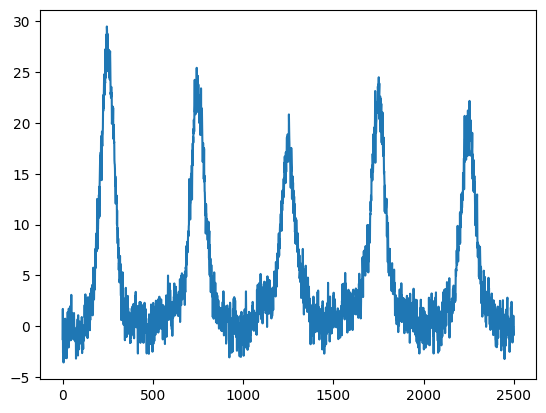

In [69]:
raman_noise_signal = raman_signal + white_noise + pink_noise
plt.plot(raman_noise_signal)
plt.show()